In [2]:
import pandas as pd
import nfl_data_py as nfl 
import numpy as np
from adjustText import adjust_text
from scipy.stats import linregress
import scipy.stats as st
import os
import matplotlib.pyplot as plt

In [3]:
# Import draft pics from 2000-2023

draft_df = pd.read_csv('Resources/draft_2000-2023.csv')
draft_df.head()

,draft_year,rnd,pick,tm,player,pos,g,search_key,id,year_signed,signing_tm,value,value_norm,gtd,gtd_norm
0,2000,1.0,1.0,CLE,Courtney Brown,DE,61.0,"Courtney Brown, DE",0,2000.0,Browns,44939436.0,0.722824,10880250.0,0.175002
1,2000,1.0,1.0,CLE,Courtney Brown,DE,61.0,"Courtney Brown, DE",0,2004.0,Browns,14700000.0,0.182423,2000000.0,0.024819
2,2000,1.0,1.0,CLE,Courtney Brown,DE,61.0,"Courtney Brown, DE",0,2003.0,Browns,20500000.0,0.273308,1000000.0,0.013332
3,2000,1.0,1.0,CLE,Courtney Brown,DE,61.0,"Courtney Brown, DE",0,2005.0,Broncos,18800000.0,0.219883,1260000.0,0.014737
4,2000,1.0,1.0,CLE,Courtney Brown,DE,61.0,"Courtney Brown, DE",0,2006.0,Broncos,5400000.0,0.052941,1055000.0,0.010343


In [4]:
# Condense the drafts to 2016-2019 and keeping only the first round picks

draft_16_19= draft_df[(draft_df['draft_year'] >= 2016) & 
                                   (draft_df['draft_year'] <= 2019) & 
                                   (draft_df['rnd'].isin([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]))].reset_index(drop=True)


In [5]:
# Drop columns
columns_to_drop = ['search_key', 'id', 'g', 'value_norm', 'gtd_norm']
draft_16_19.drop(columns=columns_to_drop, inplace=True)

rename_columns = {
    'player': 'player_name',
    'tm': 'team',
    'signing_tm': 'signing_team',
    'g': 'games',
    'value': 'contract_amount',
    'gtd': 'guarantee_amount',

}

draft_16_19.rename(columns= rename_columns, inplace=True)

# Created a dictionary 

nfl_team_names = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'LV',
    'Chargers': 'LAC',
    'Rams': 'LAR',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Commanders': 'WAS'
}

team_update_dict = {
    "GNB" : "GB",
    "KAN" : "KC",
    "NOR" : "NO",
    "NWE" : "NE",
    "OAK" : "LV",
    "SFO" : "SF",
    "TAM" : "TB",
    "SDG" : "LAC",
}

draft_16_19['signing_team'] = draft_16_19['signing_team'].map(nfl_team_names).fillna(draft_16_19['signing_team'])
draft_16_19['team'] = draft_16_19['team'].map(team_update_dict).fillna(draft_16_19['team'])

# Get rid of unneecessary decimals

draft_16_19['rnd'] = draft_16_19['rnd'].astype(int)
draft_16_19['pick'] = draft_16_19['pick'].astype(int)
draft_16_19['year_signed'] = draft_16_19['year_signed'].astype(int)

# Display data frame
draft_16_19.head(10)



,draft_year,rnd,pick,team,player_name,pos,year_signed,signing_team,contract_amount,guarantee_amount
0,2016,1,1,LAR,Jared Goff,QB,2019,DET/LAR,134000000.0,110042682.0
1,2016,1,1,LAR,Jared Goff,QB,2016,LAR,27937672.0,27937672.0
2,2016,1,2,PHI,Carson Wentz,QB,2019,IND/PHI/WAS,128000000.0,107870683.0
3,2016,1,2,PHI,Carson Wentz,QB,2016,PHI,26676338.0,26676338.0
4,2016,1,3,LAC,Joey Bosa,DE,2020,LAC,135000000.0,102000000.0
5,2016,1,3,LAC,Joey Bosa,DE,2016,LAC,25873672.0,25873672.0
6,2016,1,4,DAL,Ezekiel Elliott,RB,2019,DAL,90000000.0,50052137.0
7,2016,1,4,DAL,Ezekiel Elliott,RB,2016,DAL,24956338.0,24956338.0
8,2016,1,4,DAL,Ezekiel Elliott,RB,2023,NE,3000000.0,1100000.0
9,2016,1,5,JAX,Jalen Ramsey,CB,2020,MIA/LAR,100000000.0,71203000.0


In [6]:
# Import data from 'nfl_data_py' library

import_data = nfl.import_draft_picks(range(2016, 2020))
nfl_import = pd.DataFrame(import_data)

# Save it as a new csv file
csv_path = os.path.join('Resources', 'from_nfl_data.csv')
nfl_import.to_csv(csv_path, index=False)



In [7]:
# Read the "from_nfl_data" file

library_draft = pd.read_csv('Resources/from_nfl_data.csv')
library_draft.fillna(0, inplace=True)


In [8]:
columns_to_keep = ['pfr_player_name', 'college', \
                   'age', 'allpro', 'seasons_started', 'games', 'pass_yards', \
                    'pass_tds', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'def_ints', \
                        'def_sacks']

players_stats = library_draft[columns_to_keep]

In [9]:
# Rename Columns

rename_columns = {
    'pfr_player_name': 'player_name',
    'category': 'position'
}

players_stats.rename(columns= rename_columns, inplace=True)

# Get rid of unnecessary decimals

players_stats['age'] = players_stats['age'].astype(int)
players_stats['games'] = players_stats['games'].astype(int)

# Display data frame

players_stats.head()

/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_91482/517581330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats.rename(columns= rename_columns, inplace=True)
/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_91482/517581330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_stats['age'] = players_stats['age'].astype(int)
/var/folders/sn/wbw1h1x1453cs98dqd5z86h80000gn/T/ipykernel_91482/517581330.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,player_name,college,age,allpro,seasons_started,games,pass_yards,pass_tds,rush_yards,rush_tds,receptions,rec_yards,def_ints,def_sacks
0,Jared Goff,California,21,0,6,117,30429.0,185.0,495.0,12.0,1.0,5.0,0.0,0.0
1,Carson Wentz,North Dakota St.,23,0,6,95,22292.0,153.0,1418.0,11.0,2.0,11.0,0.0,0.0
2,Joey Bosa,Ohio St.,21,0,6,93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
3,Ezekiel Elliott,Ohio St.,21,1,7,120,4.0,0.0,8904.0,71.0,356.0,2649.0,0.0,0.0
4,Jalen Ramsey,Florida St.,21,3,7,118,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.0


In [10]:
merged_nfl_df = pd.merge(draft_16_19, players_stats, how='left', on='player_name')
merged_nfl_df.head()

,draft_year,rnd,pick,team,player_name,pos,year_signed,signing_team,contract_amount,guarantee_amount,...,seasons_started,games,pass_yards,pass_tds,rush_yards,rush_tds,receptions,rec_yards,def_ints,def_sacks
0,2016,1,1,LAR,Jared Goff,QB,2019,DET/LAR,134000000.0,110042682.0,...,6.0,117.0,30429.0,185.0,495.0,12.0,1.0,5.0,0.0,0.0
1,2016,1,1,LAR,Jared Goff,QB,2016,LAR,27937672.0,27937672.0,...,6.0,117.0,30429.0,185.0,495.0,12.0,1.0,5.0,0.0,0.0
2,2016,1,2,PHI,Carson Wentz,QB,2019,IND/PHI/WAS,128000000.0,107870683.0,...,6.0,95.0,22292.0,153.0,1418.0,11.0,2.0,11.0,0.0,0.0
3,2016,1,2,PHI,Carson Wentz,QB,2016,PHI,26676338.0,26676338.0,...,6.0,95.0,22292.0,153.0,1418.0,11.0,2.0,11.0,0.0,0.0
4,2016,1,3,LAC,Joey Bosa,DE,2020,LAC,135000000.0,102000000.0,...,6.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0


In [11]:
#Plot (Bar Chart?) - Players Drafted getting second contract
multiple_teams_df = merged_nfl_df[ (merged_nfl_df['year_signed'] != merged_nfl_df['draft_year'])]
multiple_teams_df


,draft_year,rnd,pick,team,player_name,pos,year_signed,signing_team,contract_amount,guarantee_amount,...,seasons_started,games,pass_yards,pass_tds,rush_yards,rush_tds,receptions,rec_yards,def_ints,def_sacks
0,2016,1,1,LAR,Jared Goff,QB,2019,DET/LAR,134000000.0,110042682.0,...,6.0,117.0,30429.0,185.0,495.0,12.0,1.0,5.0,0.0,0.0
2,2016,1,2,PHI,Carson Wentz,QB,2019,IND/PHI/WAS,128000000.0,107870683.0,...,6.0,95.0,22292.0,153.0,1418.0,11.0,2.0,11.0,0.0,0.0
4,2016,1,3,LAC,Joey Bosa,DE,2020,LAC,135000000.0,102000000.0,...,6.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0
6,2016,1,4,DAL,Ezekiel Elliott,RB,2019,DAL,90000000.0,50052137.0,...,7.0,120.0,4.0,0.0,8904.0,71.0,356.0,2649.0,0.0,0.0
8,2016,1,4,DAL,Ezekiel Elliott,RB,2023,NE,3000000.0,1100000.0,...,7.0,120.0,4.0,0.0,8904.0,71.0,356.0,2649.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4040,2019,7,254,ARI,Caleb Wilson,TE,2020,PHI,205412.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4041,2019,7,254,ARI,Caleb Wilson,TE,2021,DEN,165600.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,2019,7,254,ARI,Caleb Wilson,TE,2021,DEN,165600.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,2019,7,254,ARI,Caleb Wilson,TE,2020,PHI,142800.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def has_second_contract(row):
    return row['year_signed'] != row['draft_year'] and row['team'] in row['signing_team']

# Apply the function and create the 'second_contract' column
merged_nfl_df['second_contract'] = merged_nfl_df.apply(has_second_contract, axis=1)

# Remove duplicate players, keeping only the first occurrence
merged_nfl_df_unique = merged_nfl_df.drop_duplicates(subset='player_name')
merged_nfl_df_unique

,draft_year,rnd,pick,team,player_name,pos,year_signed,signing_team,contract_amount,guarantee_amount,...,games,pass_yards,pass_tds,rush_yards,rush_tds,receptions,rec_yards,def_ints,def_sacks,second_contract
0,2016,1,1,LAR,Jared Goff,QB,2019,DET/LAR,134000000.0,110042682.0,...,117.0,30429.0,185.0,495.0,12.0,1.0,5.0,0.0,0.0,True
2,2016,1,2,PHI,Carson Wentz,QB,2019,IND/PHI/WAS,128000000.0,107870683.0,...,95.0,22292.0,153.0,1418.0,11.0,2.0,11.0,0.0,0.0,True
4,2016,1,3,LAC,Joey Bosa,DE,2020,LAC,135000000.0,102000000.0,...,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,True
6,2016,1,4,DAL,Ezekiel Elliott,RB,2019,DAL,90000000.0,50052137.0,...,120.0,4.0,0.0,8904.0,71.0,356.0,2649.0,0.0,0.0,True
9,2016,1,5,JAX,Jalen Ramsey,CB,2020,MIA/LAR,100000000.0,71203000.0,...,118.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,2019,7,251,LAR,Dakota Allen,LB,2021,JAX,850000.0,0.0,...,38.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4023,2019,7,252,NE,Ken Webster,CB,2021,SF,850000.0,0.0,...,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4028,2019,7,253,WAS,Jordan Brailford,DE,2022,ATL,825000.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4034,2019,7,254,ARI,Caleb Wilson,TE,2020,WAS,1525000.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [13]:
merged_nfl_df["player_name"].value_counts

<bound method IndexOpsMixin.value_counts of 0           Jared Goff
1           Jared Goff
2         Carson Wentz
3         Carson Wentz
4            Joey Bosa
             ...      
4042      Caleb Wilson
4043      Caleb Wilson
4044      Caleb Wilson
4045    Jalen Thompson
4046    Jalen Thompson
Name: player_name, Length: 4047, dtype: object>

NFL Overview 

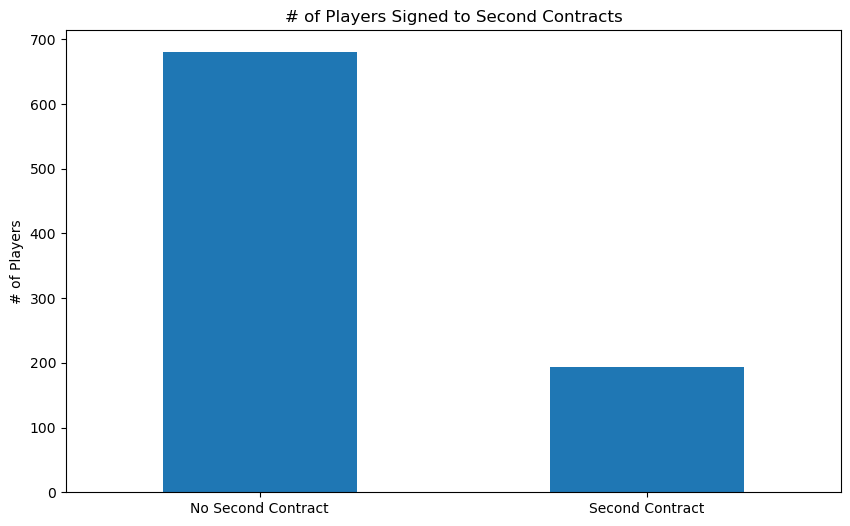

In [14]:
# Count the number of players with and without a second contract
contract_counts = merged_nfl_df_unique['second_contract'].value_counts()

# Create the bar plot
contract_counts.plot(kind='bar', figsize=(10, 6))
plt.title('# of Players Signed to Second Contracts')
plt.ylabel('# of Players')
plt.xlabel("")
plt.xticks(ticks=[0, 1], labels=['No Second Contract', 'Second Contract'], rotation=0)

#Save Plot
plt.savefig("output_data/Fig1.png")

#Show Plot
plt.show()


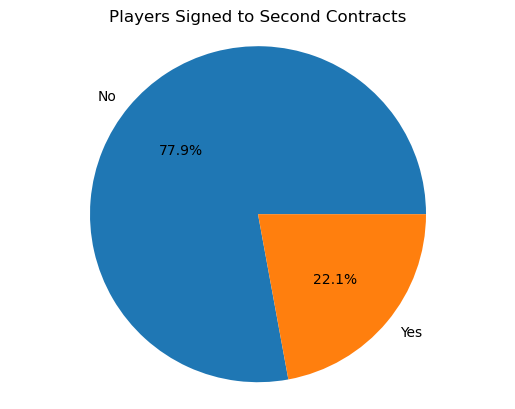

In [15]:
# Calculate percentages
contract_percentages = contract_counts / contract_counts.sum() * 100

# Create the pie chart
plt.pie(contract_percentages, labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Players Signed to Second Contracts')
plt.axis('equal')  

# save figure to output_data
plt.savefig("output_data/Fig2.png")

#show plot 
plt.show()



Team Breakdown 

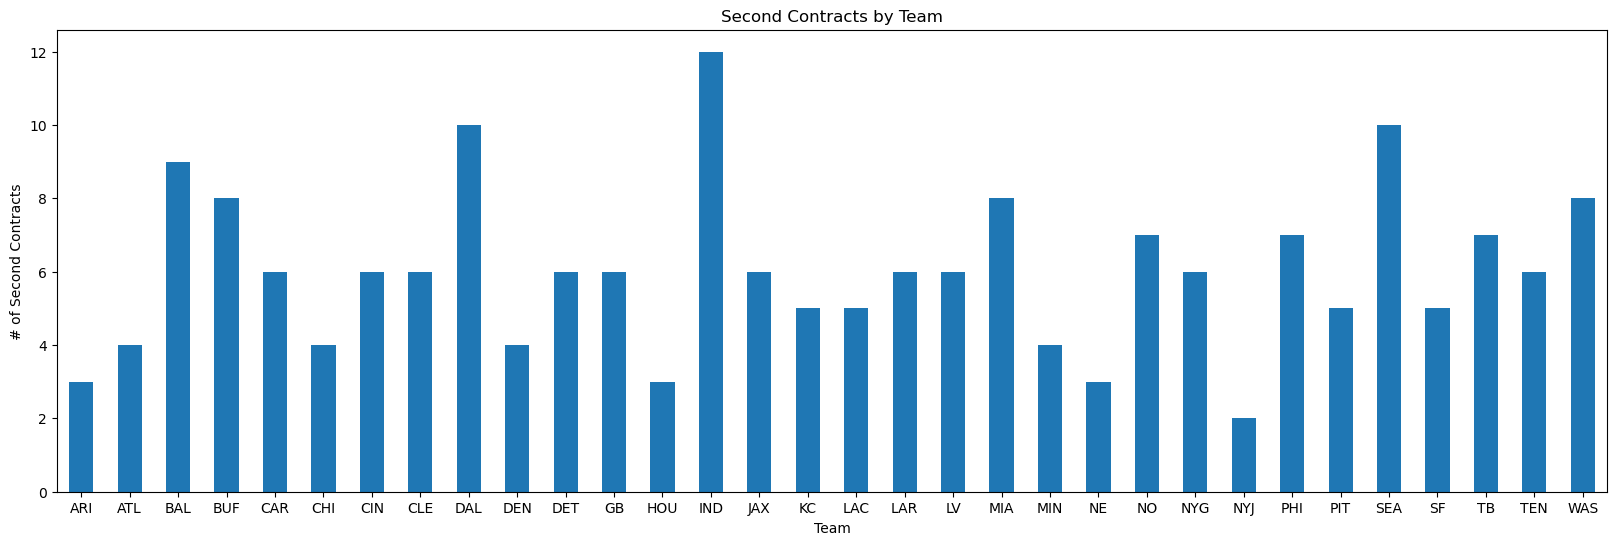

In [16]:
# Count second contracts by team
contracts_by_team = merged_nfl_df_unique[merged_nfl_df_unique['second_contract']].groupby('team').size()

# Create the bar plot
plt.figure(figsize=(20, 6))
contracts_by_team.plot(kind='bar')
plt.title('Second Contracts by Team')
plt.ylabel('# of Second Contracts')
plt.xlabel("Team")
plt.xticks(rotation=0)


#save figure to output_data
plt.savefig("output_data/Fig3.png")

#show plot
plt.show()


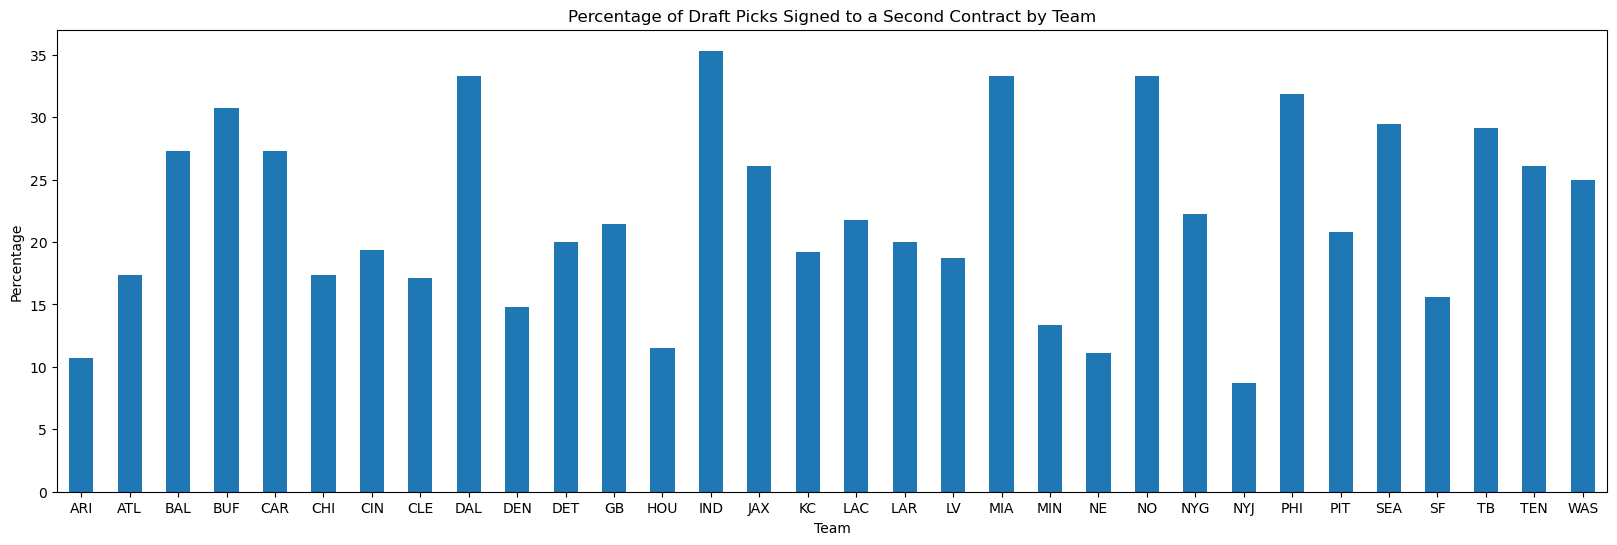

In [17]:
# Calculate the percentage of draft picks signed to a second contract by team
total_by_team = merged_nfl_df_unique.groupby('team').size()
percent_second_contracts_by_team = (contracts_by_team / total_by_team) * 100

# Create the bar plot
plt.figure(figsize=(20, 6))
percent_second_contracts_by_team.plot(kind='bar')
plt.title('Percentage of Draft Picks Signed to a Second Contract by Team')
plt.ylabel('Percentage')
plt.ylim(0, 37) 
plt.xlabel("Team")
plt.xticks(rotation=0) 

#save plot
plt.savefig("output_data/Fig4.png")

#show plot
plt.show()

Round Breakdown 

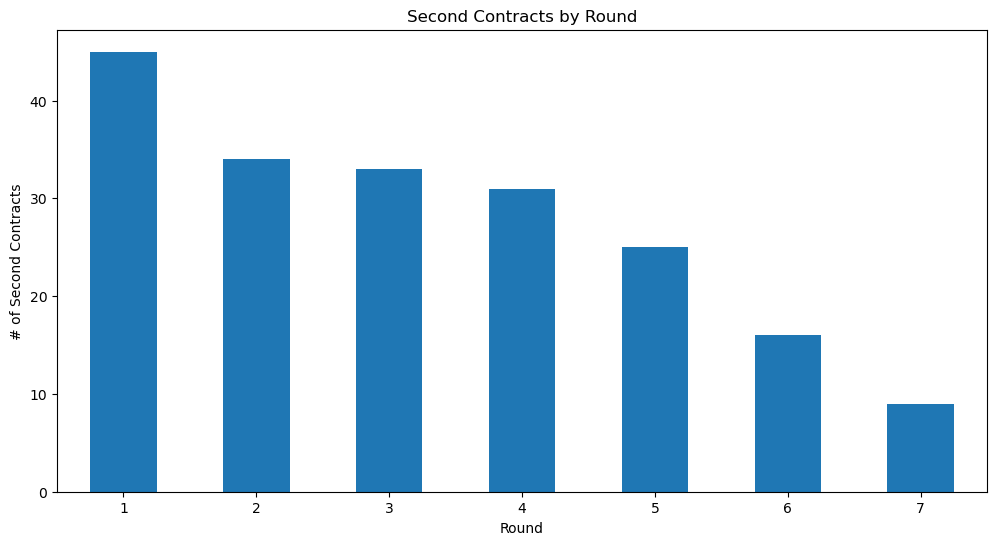

In [18]:
# Count second contracts by round
contracts_by_round = merged_nfl_df_unique[merged_nfl_df_unique['second_contract']].groupby('rnd').size()

# Create the bar plot
plt.figure(figsize=(12, 6))
contracts_by_round.plot(kind='bar')
plt.title('Second Contracts by Round')
plt.xlabel('Round')
plt.ylabel('# of Second Contracts')
plt.xticks(rotation=0) 

#Save plot
plt.savefig("output_data/Fig5.png")

#Show Plot
plt.show()


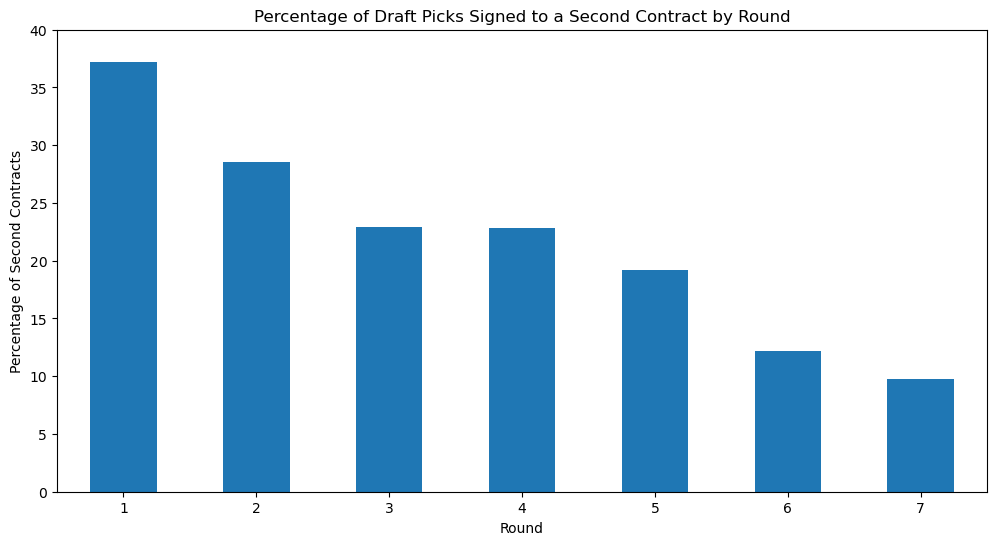

In [19]:
# Calculate the percentage of draft picks signed to a second contract by round
total_by_round = merged_nfl_df_unique.groupby('rnd').size()
percent_second_contracts_by_round = (contracts_by_round / total_by_round) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
percent_second_contracts_by_round.plot(kind='bar')
plt.title('Percentage of Draft Picks Signed to a Second Contract by Round')
plt.xlabel('Round')
plt.ylabel('Percentage of Second Contracts')
plt.ylim(0, 40)  
plt.xticks(rotation=0) 

#Save Plot 
plt.savefig("output_data/Fig6.png")

#Show plot
plt.show()


Position Breakdown 

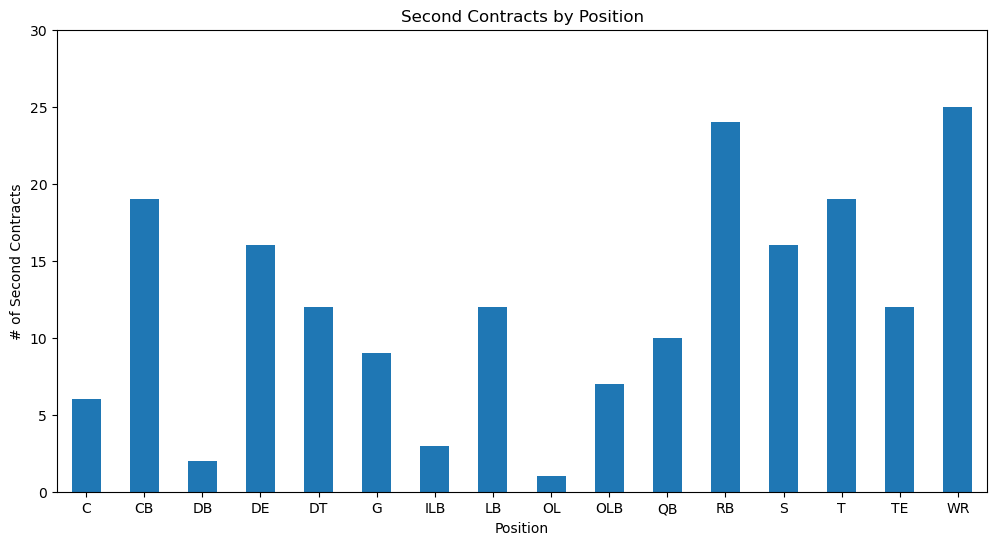

In [20]:
# Count second contracts by position
contracts_by_position = merged_nfl_df_unique[merged_nfl_df_unique['second_contract']].groupby('pos').size()

# Create the bar plot
# Need to adjust the .5s
plt.figure(figsize=(12, 6))
contracts_by_position.plot(kind='bar')
plt.title('Second Contracts by Position')
plt.ylabel('# of Second Contracts')
plt.xlabel('Position')
plt.ylim(0, 30)
y_min, y_max = plt.ylim()
plt.yticks(np.arange(int(y_min), int(y_max) + 1, 5))
plt.xticks(rotation=0) 

#Save Plot
plt.savefig("output_data/Fig7.png")

#Show Plot
plt.show()



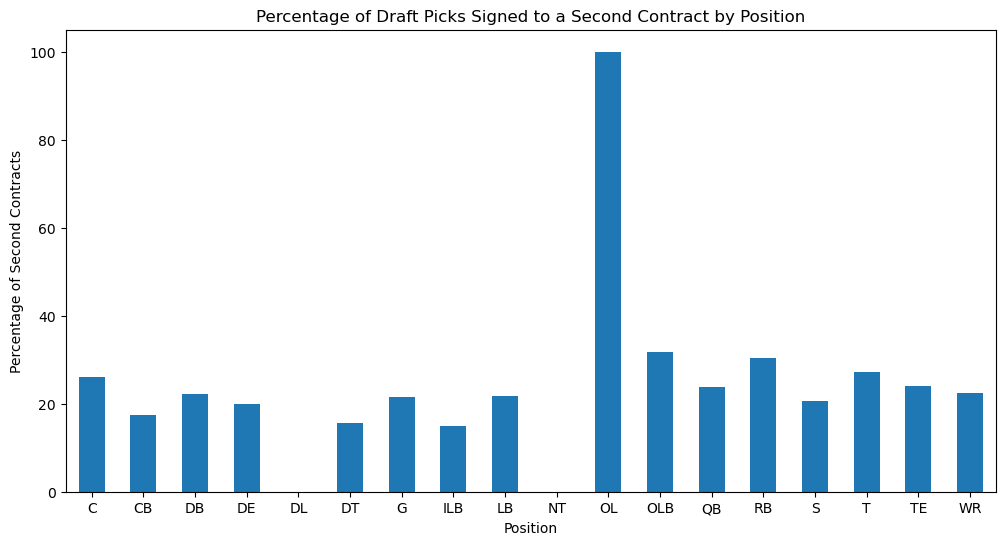

In [21]:
# Calculate the percentage of draft picks signed to a second contract by position
total_by_position = merged_nfl_df_unique.groupby('pos').size()
percent_second_contracts_by_position = (contracts_by_position / total_by_position) * 100

# Create the bar plot
plt.figure(figsize=(12, 6))
percent_second_contracts_by_position.plot(kind='bar')
plt.title('Percentage of Draft Picks Signed to a Second Contract by Position')
plt.ylabel('Percentage of Second Contracts')
plt.ylim(0, 105)
plt.xlabel('Position')  
plt.xticks(rotation=0) 

#Save Plot
plt.savefig("output_data/Fig8.png")

#Show Plot
plt.show()

Year to Year Breakdown

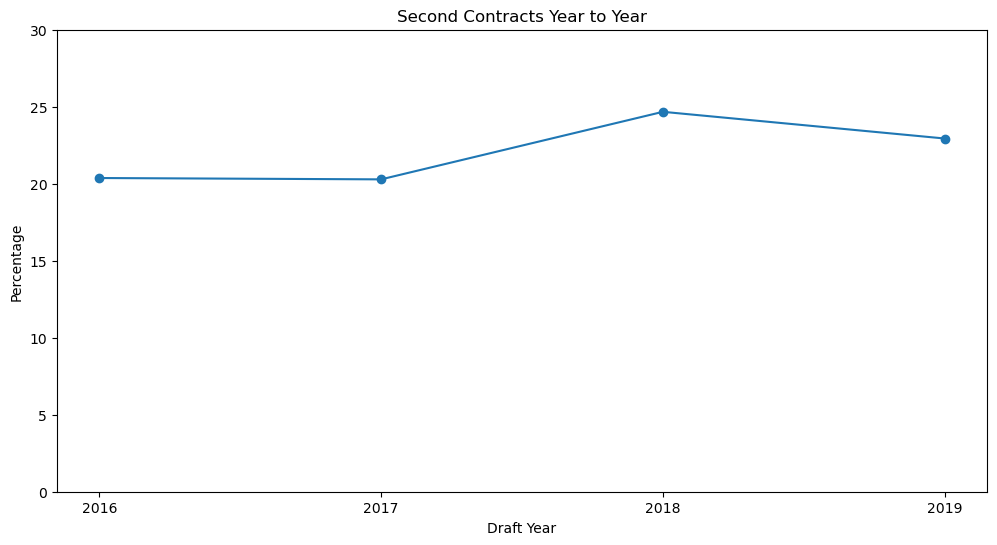

In [22]:
yearly_total = merged_nfl_df_unique.groupby('draft_year').size()
yearly_second_contracts = merged_nfl_df_unique[merged_nfl_df_unique['second_contract']].groupby('draft_year').size()
percent_second_contracts_by_year = (yearly_second_contracts / yearly_total) * 100

# Create the line plot
plt.figure(figsize=(12, 6))
percent_second_contracts_by_year.plot(kind='line', marker='o')
plt.title('Second Contracts Year to Year')
plt.xlabel('Draft Year')
plt.ylabel('Percentage')
plt.ylim(0, 30)  
plt.xticks(ticks=percent_second_contracts_by_year.index, labels=percent_second_contracts_by_year.index)

#Save Plot
plt.savefig("output_data/Fig9.png")

#Show Plot
plt.show()


Further Analysis 

In [23]:
# Group by team and position, and count the number of players
team_position_grouped = merged_nfl_df_unique.groupby(['team', 'pos']).size().unstack(fill_value=0)

# Display DataFrame
team_position_grouped

pos,C,CB,DB,DE,DL,DT,G,ILB,LB,NT,OL,OLB,QB,RB,S,T,TE,WR
team,,,,,,,,,,,,,,,,,,
ARI,3,3,1,2,0,1,0,0,0,0,0,0,2,2,4,4,1,5
ATL,0,4,0,2,0,1,3,0,1,0,0,2,0,3,2,1,2,2
BAL,1,5,1,6,0,2,2,0,1,0,0,0,2,2,1,4,2,4
BUF,0,5,0,2,0,3,2,2,2,0,0,0,3,2,0,1,2,2
CAR,0,6,0,2,0,1,1,1,2,0,0,0,1,2,0,2,1,3
CHI,1,2,0,1,0,2,1,2,1,0,0,0,1,4,3,0,1,4
CIN,1,3,0,2,0,2,3,1,2,1,0,1,2,4,2,0,2,5
CLE,1,3,1,4,0,2,1,0,3,0,0,1,3,2,3,3,2,6
DAL,0,4,0,4,0,3,1,0,1,0,0,2,2,4,3,1,1,4


In [24]:
# Calculate total draft picks and second contracts by team
total_by_team = merged_nfl_df_unique.groupby('team').size()
second_contracts_by_team = merged_nfl_df_unique[merged_nfl_df_unique['second_contract']].groupby('team').size()
hit_rate_by_team = round((second_contracts_by_team / total_by_team) * 100, 2)

# Combine into a DataFrame
hit_rate_df = pd.DataFrame({
    'total_picks': total_by_team,
    'second_contracts': second_contracts_by_team,
    'hit_rate': hit_rate_by_team
}).reset_index()

# Fill NaN values with 0 (in case there are teams with 0 second contracts)
hit_rate_df = hit_rate_df.fillna(0)

# Display the hit rate DataFrame
hit_rate_df

,team,total_picks,second_contracts,hit_rate
0,ARI,28,3,10.71
1,ATL,23,4,17.39
2,BAL,33,9,27.27
3,BUF,26,8,30.77
4,CAR,22,6,27.27
5,CHI,23,4,17.39
6,CIN,31,6,19.35
7,CLE,35,6,17.14
8,DAL,30,10,33.33
9,DEN,27,4,14.81


In [25]:
# Sort by hit rate
hit_rate_df_sorted = hit_rate_df.sort_values(by='hit_rate', ascending=False)

# Get top and bottom teams
top_teams = hit_rate_df_sorted.head(5)
middle_teams = hit_rate_df_sorted.iloc[12:17]
bottom_teams = hit_rate_df_sorted.tail(5)

# Display top and bottom teams
print("Top Teams:\n", top_teams)
print("Middle Teams:\n", middle_teams)
print("Bottom Teams:\n", bottom_teams)

Top Teams:
    team  total_picks  second_contracts  hit_rate
13  IND           34                12     35.29
8   DAL           30                10     33.33
22   NO           21                 7     33.33
19  MIA           24                 8     33.33
25  PHI           22                 7     31.82
Middle Teams:
    team  total_picks  second_contracts  hit_rate
31  WAS           32                 8     25.00
23  NYG           27                 6     22.22
16  LAC           23                 5     21.74
11   GB           28                 6     21.43
26  PIT           24                 5     20.83
Bottom Teams:
    team  total_picks  second_contracts  hit_rate
20  MIN           30                 4     13.33
12  HOU           26                 3     11.54
21   NE           27                 3     11.11
0   ARI           28                 3     10.71
24  NYJ           23                 2      8.70


In [26]:
# Define the top five and bottom five teams
# top_five_teams = ['BAL', 'IND', 'BUF', 'CAR', 'NYG']
# middle_five_teams = ['LAC', 'SDG', 'CHI', 'SFO', 'TAM']
# bottom_five_teams = ['OAK', 'SDG', 'CHI', 'SFO', 'TAM']

# # Filter the DataFrame for the specified teams
# top_teams_df = team_position_grouped[team_position_grouped['team'].isin(top_five_teams)]
# bottom_teams_df = team_position_grouped[team_position_grouped['team'].isin(bottom_five_teams)]

In [27]:
#Create Graph that shows # of players drafted at each position for the top 5 teams vs. the middle 5 teams vs. the bottoms 5 teams

Draft Success vs. Win/Loss Record 

In [28]:
nfl_record = pd.read_csv('Resources/nfl_record.csv')
nfl_record['percentage'] = nfl_record['percentage'] * 100
nfl_record.head()

,team,record,percentage
0,KC,63-20,75.9
1,BUF,58-24,70.7
2,GB,56-27,67.5
3,BAL,56-27,67.5
4,SF,54-29,65.1


In [29]:
hit_rate_record_merged = pd.merge(hit_rate_df, nfl_record, on='team')

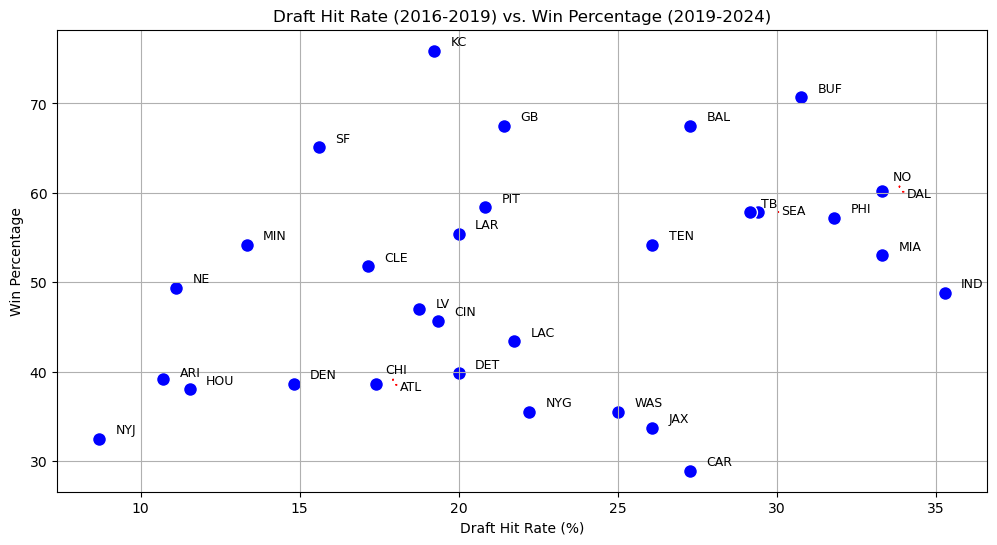

In [30]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(hit_rate_record_merged['hit_rate'], hit_rate_record_merged['percentage'], c='blue', edgecolors='w', s=100)
plt.title('Draft Hit Rate (2016-2019) vs. Win Percentage (2019-2024)')
plt.xlabel('Draft Hit Rate (%)')
plt.ylabel('Win Percentage')
plt.grid(True)

#The text is overlapping one another, it needs to be seperated.
#Reference: https://stackoverflow.com/questions/61137492/using-adjusttext-to-avoid-label-overlap-with-python-prince-correspondence-analys
texts = [plt.text(hit_rate_record_merged['hit_rate'][i] + 0.5, hit_rate_record_merged['percentage'][i], 
                  hit_rate_record_merged['team'][i], fontsize=9) for i in range(len(hit_rate_record_merged))]
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig("output_data/Fig13.png")

# Talk about the relationships via this
# Why each graph matters towards the goal of successful teams (win rate)

plt.show()


The r-value is: 0.1150


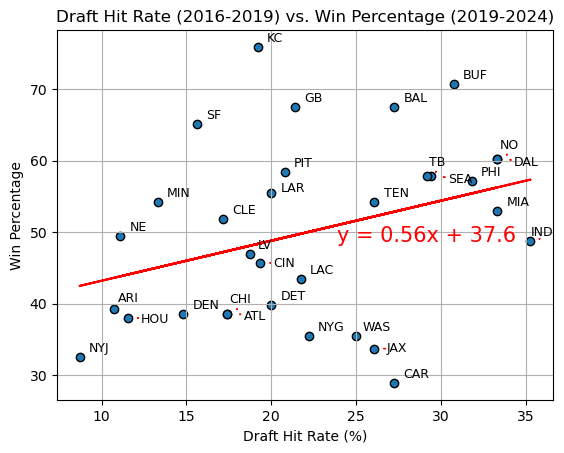

In [34]:
#Linear Regression Plot and R Value
x_values = hit_rate_record_merged['hit_rate']
y_values = hit_rate_record_merged['percentage']

def plot_linear_regression(x_values, y_values):

    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # print r-value
    print(f"The r-value is: {rvalue**2:.4f}")

    # Plot
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values,regress_values,"r-")
    plt.title('Draft Hit Rate (2016-2019) vs. Win Percentage (2019-2024)')
    plt.xlabel('Draft Hit Rate (%)')
    plt.ylabel('Win Percentage')
    plt.grid(True)

    #The text is overlapping one another, it needs to be seperated.
    texts = [plt.text(hit_rate_record_merged['hit_rate'][i] + 0.5, hit_rate_record_merged['percentage'][i], 
                    hit_rate_record_merged['team'][i], fontsize=9) for i in range(len(hit_rate_record_merged))]
    adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

     # Calculate annotation position based on percentiles
    x_annotate = np.percentile(x_values, 60)
    y_annotate = np.percentile(y_values, 45)

    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color="red")

    plt.savefig("output_data/Fig14.png")
    # Show plot
    plt.show()

#Moderate-Positive correlation on the Hit Rate to Win Percentage
plot_linear_regression(x_values, y_values)